In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sc
from scipy import io
from IPython import display
import time
from scipy.stats import multivariate_normal

from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression, CCA

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from matplotlib import rc
from matplotlib.patches import Ellipse
rc('text', usetex=True)

In [195]:
np.random.seed(58)
size = 500

x_mean = np.array([0., 0.])
x_cov = np.array([[.25, .2],
                 [.2, .3]])
U, S, V = np.linalg.svd(x_cov)

X = np.random.randn(size, 2) * np.sqrt(S)
Y = np.stack((2 * X[:, 1], np.zeros_like(X[:, 1])),axis=-1) + 0.3 * np.random.randn(*X.shape)

X = X.dot(V.T)

alpha = np.pi * 130 / 180

rotation_matrix = np.array([
    [np.cos(alpha), np.sin(alpha)],
    [-np.sin(alpha), np.cos(alpha)]
])

Y = Y.dot(rotation_matrix)

lower_limit = min(X[:, 0].min(), X[:, 1].min(), Y[:, 0].min(), Y[:, 1].min())
upper_limit = max(X[:, 0].max(), X[:, 1].max(), Y[:, 0].max(), Y[:, 1].max())

In [196]:
np.random.seed(58)
size = 300
X_test = np.random.randn(size, 2) * np.sqrt(S)
Y_test = np.stack((2 * X_test[:, 1], np.zeros_like(X_test[:, 1])),axis=-1) + 0.3 * np.random.randn(*X_test.shape)

X_test = X_test.dot(V.T)

alpha = np.pi * 130 / 180

rotation_matrix = np.array([
    [np.cos(alpha), np.sin(alpha)],
    [-np.sin(alpha), np.cos(alpha)]
])

Y_test = Y_test.dot(rotation_matrix)

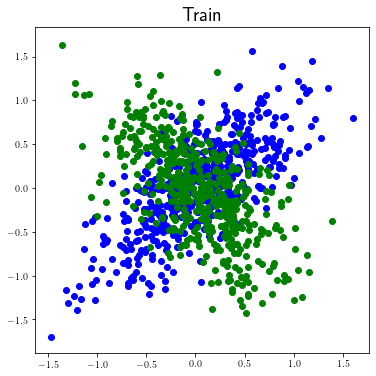

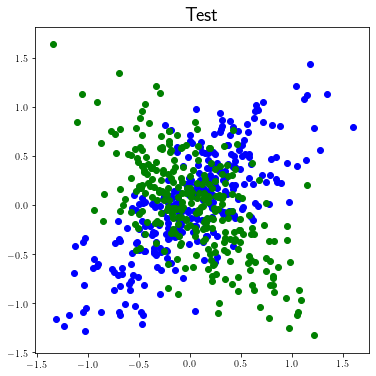

In [197]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c='b')
plt.scatter(Y[:, 0], Y[:, 1], c='g')
plt.title('Train', fontsize=20)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c='b')
plt.scatter(Y_test[:, 0], Y_test[:, 1], c='g')
plt.title('Test', fontsize=20)
plt.show()

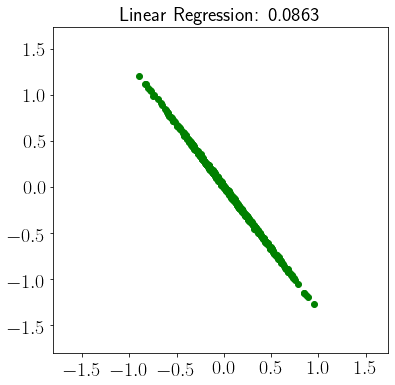

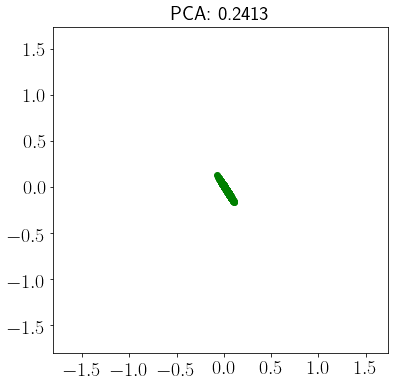

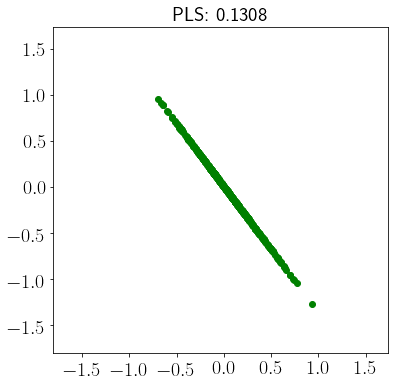

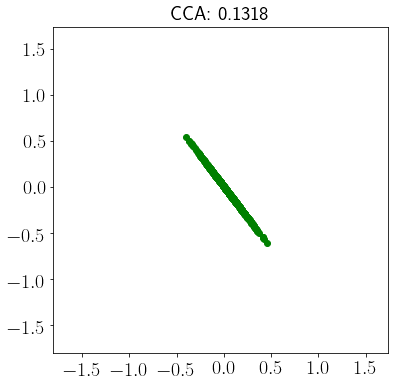

In [198]:
X_test = X
Y_test = Y

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X_test)
error = np.mean((Y_pred - Y_test) ** 2)

plt.figure(figsize=(6, 6))
plt.scatter(Y_pred[:, 0], Y_pred[:, 1], c='g')
plt.xlim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.ylim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Linear Regression: {:.4f}'.format(error), fontsize=20)
plt.show()

model = LinearRegression()
pca = PCA(n_components=1)
pca.fit(X)
x_pca = pca.transform(X)
model.fit(x_pca, Y)
x_pca = pca.transform(X_test)
Y_pred = model.predict(x_pca)
error = np.mean((Y_pred - Y_test) ** 2)

plt.figure(figsize=(6, 6))
plt.scatter(Y_pred[:, 0], Y_pred[:, 1], c='g')
plt.xlim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.ylim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('PCA: {:.4f}'.format(error), fontsize=20)
plt.show()

pls = PLSRegression(n_components=1)
pls.fit(X, Y)
Y_pred = pls.predict(X_test)
error = np.mean((Y_pred - Y_test) ** 2)

plt.figure(figsize=(6, 6))
plt.scatter(Y_pred[:, 0], Y_pred[:, 1], c='g')
plt.xlim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.ylim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('PLS: {:.4f}'.format(error), fontsize=20)
plt.show()

cca = CCA(n_components=1)
cca.fit(X, Y)
Y_pred = cca.predict(X_test)
error = np.mean((Y_pred - Y_test) ** 2)

plt.figure(figsize=(6, 6))
plt.scatter(Y_pred[:, 0], Y_pred[:, 1], c='g')
plt.xlim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.ylim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('CCA: {:.4f}'.format(error), fontsize=20)
plt.show()

In [199]:
pca = PCA(n_components=2)
pca.fit(X)
x_comps = pca.components_
x_h, x_w = pca.explained_variance_

pca = PCA(n_components=2)
pca.fit(Y)
y_comps = pca.components_
y_h, y_w = pca.explained_variance_

print(x_comps)
print(y_comps)

pls = PLSRegression(n_components=2)

pls.fit(X, Y)

W = pls.x_weights_.T
C = pls.y_weights_.T
T = pls.x_scores_
U = pls.y_scores_
P = pls.x_loadings_
Q = pls.y_loadings_

x_angle = 90 + np.arccos(x_comps[0][0]) * 180 / np.pi
y_angle = np.arccos(y_comps[0][0]) * 180 / np.pi
print(x_angle, y_angle)

[[-0.69157091 -0.72230858]
 [ 0.72230858 -0.69157091]]
[[-0.59130513  0.80644792]
 [-0.80644792 -0.59130513]]
223.75458886205126 126.24967898885726


In [200]:
cov = T[:, 0].dot(U[:, 0]) / len(T)
corr = cov / np.sqrt(T[:, 0].dot(T[:, 0]) / len(T)) / np.sqrt(U[:, 0].dot(U[:, 0]) / len(T))
print('cov', cov)
print('corr', corr)
cov = T[:, 1].dot(U[:, 1]) / len(T)
corr = cov / np.sqrt(T[:, 1].dot(T[:, 1]) / len(T)) / np.sqrt(U[:, 1].dot(U[:, 1]) / len(T))
print('cov', cov)
print('corr', corr)

cov 0.3902425510576181
corr 0.7448053563237929
cov 1.1477086965367003
corr 0.7039607776607041


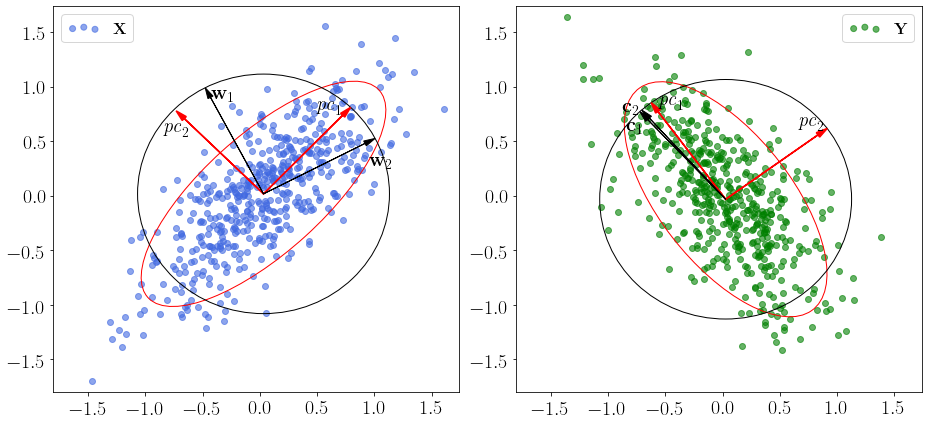

In [201]:
circle_radius = 2.2
ellipse_radius = 4
limit_epsilon = 0.1


x_ellipse = Ellipse(
    X.mean(axis=0), height=ellipse_radius * np.sqrt(x_w), width=ellipse_radius * np.sqrt(x_h), 
    fill=False, angle=x_angle, color='r'
)
y_ellipse = Ellipse(
    Y.mean(axis=0), height=ellipse_radius * np.sqrt(y_w) , width=ellipse_radius * np.sqrt(y_h), 
    fill=False, angle=y_angle, color='r'
)

unit_ball1 = Ellipse(X.mean(axis=0), height=circle_radius, width=circle_radius, fill=False, color='k')
unit_ball2 = Ellipse(Y.mean(axis=0), height=circle_radius, width=circle_radius, fill=False, color='k')


plt.figure(figsize=(13, 6))
ax = plt.subplot(1, 2, 1)

ax.scatter(X[:, 0], X[:, 1], alpha=0.6, c='royalblue', label='$\mathbf{X}$')

plt.text(-0.43, 0.87, '$\mathbf{w}_1$', fontsize=20)
plt.text(.49, .75, '$\mathit{pc}_1$', fontsize=20)
plt.text(.95, .25, '$\mathbf{w}_2$', fontsize=20)
plt.text(-.85, .55, '$\mathit{pc}_2$', fontsize=20)
ax.add_artist(x_ellipse)
ax.add_artist(unit_ball1)
pc1 = []

ax.arrow(
    *X.mean(axis=0), -x_comps[0][0], -x_comps[0][1], 
    linewidth=1.5, head_width=0.05, head_length=0.1, color='r'
)
ax.arrow(
    *X.mean(axis=0), -x_comps[1][0] + 0.03, -x_comps[1][1], 
    linewidth=1.5, head_width=0.05, head_length=0.1, color='r'
)

pls_dir = W / np.sqrt(np.sum(W ** 2, axis=1, keepdims=True))
ax.arrow(*X.mean(axis=0), pls_dir[0, 1], pls_dir[0, 0], linewidth=1, head_width=0.05, head_length=0.1, color='k')
ax.arrow(*X.mean(axis=0), pls_dir[1, 1], pls_dir[1, 0], linewidth=1, head_width=0.05, head_length=0.1, color='k')

plt.legend(fontsize=16, scatterpoints = 3)

plt.xlim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.ylim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = plt.subplot(1, 2, 2)
ax.scatter(Y[:, 0], Y[:, 1], alpha=0.6, c='g', label='$\mathbf{Y}$')

plt.text(-0.88, .75, '$\mathbf{c}_2$', fontsize=20)
plt.text(.66, .6, '$\mathit{pc}_2$', fontsize=20)
plt.text(-.84, .57, '$\mathbf{c}_1$', fontsize=20)
plt.text(-.56, .79, '$\mathit{pc}_1$', fontsize=20)
ax.add_artist(y_ellipse)
ax.add_artist(unit_ball2)
ax.arrow(
    *Y.mean(axis=0), -y_comps[1][0], -y_comps[0][0], 
    linewidth=1.5, head_width=0.05, head_length=0.1, color='r'
)
ax.arrow(
    *Y.mean(axis=0), y_comps[1][1], y_comps[0][1], 
    linewidth=1.5, head_width=0.05, head_length=0.1, color='r'
)

pls_dir = C / np.sqrt(np.sum(C ** 2, axis=1, keepdims=True))
ax.arrow(*Y.mean(axis=0), -pls_dir[0, 0], -pls_dir[0, 1], linewidth=1, head_width=0.05, head_length=0.1, color='k')
ax.arrow(*Y.mean(axis=0), pls_dir[1, 0], pls_dir[1, 1], linewidth=1, head_width=0.05, head_length=0.1, color='k')
plt.legend(fontsize=16, scatterpoints = 3)

plt.xlim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.ylim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('PLSFigure.pdf', format='pdf')
plt.show()

In [202]:
cca = CCA(n_components=2)

cca.fit(X, Y)

W = cca.x_weights_.T
C = cca.y_weights_.T
T = cca.x_scores_
U = cca.y_scores_
P = cca.x_loadings_
Q = cca.y_loadings_

x_angle = 90 + np.arccos(x_comps[0][0]) * 180 / np.pi
y_angle = np.arccos(y_comps[0][0]) * 180 / np.pi
print(x_angle, y_angle)

223.75458886205126 126.24967898885726


In [203]:
cov = T[:, 0].dot(U[:, 0]) / len(T)
corr = cov / np.sqrt(T[:, 0].dot(T[:, 0]) / len(T)) / np.sqrt(U[:, 0].dot(U[:, 0]) / len(T))
print('cov', cov)
print('corr', corr)
cov = T[:, 1].dot(U[:, 1]) / len(T)
corr = cov / np.sqrt(T[:, 1].dot(T[:, 1]) / len(T)) / np.sqrt(U[:, 1].dot(U[:, 1]) / len(T))
print('cov', cov)
print('corr', corr)

cov 0.56557613540351
corr 0.8837842121874446
cov 0.013615715215625407
corr 0.01687006839526194


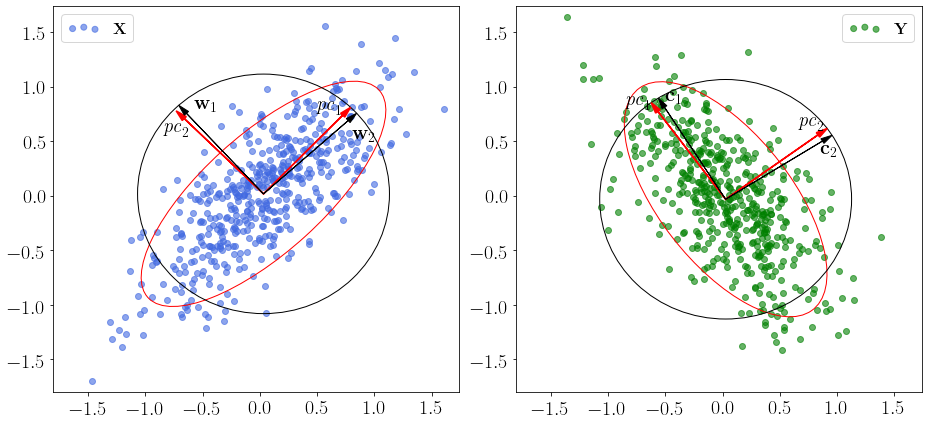

In [204]:
circle_radius = 2.2
ellipse_radius = 4
limit_epsilon = 0.1

lower_limit = min(X[:, 0].min(), X[:, 1].min(), Y[:, 0].min(), Y[:, 1].min())
upper_limit = max(X[:, 0].max(), X[:, 1].max(), Y[:, 0].max(), Y[:, 1].max())

x_ellipse = Ellipse(
    X.mean(axis=0), height=ellipse_radius * np.sqrt(x_w), width=ellipse_radius * np.sqrt(x_h), 
    fill=False, angle=x_angle, color='r'
)
y_ellipse = Ellipse(
    Y.mean(axis=0), height=ellipse_radius * np.sqrt(y_w) , width=ellipse_radius * np.sqrt(y_h), 
    fill=False, angle=y_angle, color='r'
)

unit_ball1 = Ellipse(X.mean(axis=0), height=circle_radius, width=circle_radius, fill=False, color='k')
unit_ball2 = Ellipse(Y.mean(axis=0), height=circle_radius, width=circle_radius, fill=False, color='k')


plt.figure(figsize=(13, 6))
ax = plt.subplot(1, 2, 1)

ax.scatter(X[:, 0], X[:, 1], alpha=0.6, c='royalblue', label='$\mathbf{X}$')

plt.text(-0.58, 0.78, '$\mathbf{w}_1$', fontsize=20)
plt.text(.49, .75, '$\mathit{pc}_1$', fontsize=20)
plt.text(.8, .5, '$\mathbf{w}_2$', fontsize=20)
plt.text(-.85, .55, '$\mathit{pc}_2$', fontsize=20)
ax.add_artist(x_ellipse)
ax.add_artist(unit_ball1)
pc1 = []

ax.arrow(
    *X.mean(axis=0), -x_comps[0][0], -x_comps[0][1], 
    linewidth=1.5, head_width=0.05, head_length=0.1, color='r'
)
ax.arrow(
    *X.mean(axis=0), -x_comps[1][0] + 0.03, -x_comps[1][1], 
    linewidth=1.5, head_width=0.05, head_length=0.1, color='r'
)

pls_dir = W / np.sqrt(np.sum(W ** 2, axis=1, keepdims=True))
ax.arrow(*X.mean(axis=0), pls_dir[0, 1], pls_dir[0, 0], linewidth=1, head_width=0.05, head_length=0.1, color='k')
ax.arrow(*X.mean(axis=0), pls_dir[1, 1], pls_dir[1, 0], linewidth=1, head_width=0.05, head_length=0.1, color='k')

plt.legend(fontsize=16, scatterpoints = 3)

plt.xlim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.ylim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = plt.subplot(1, 2, 2)
ax.scatter(Y[:, 0], Y[:, 1], alpha=0.6, c='g', label='$\mathbf{Y}$')

plt.text(.85, .36, '$\mathbf{c}_2$', fontsize=20)
plt.text(.66, .6, '$\mathit{pc}_2$', fontsize=20)
plt.text(-.5, .85, '$\mathbf{c}_1$', fontsize=20)
plt.text(-.85, .79, '$\mathit{pc}_1$', fontsize=20)
ax.add_artist(y_ellipse)
ax.add_artist(unit_ball2)
ax.arrow(
    *Y.mean(axis=0), -y_comps[1][0], -y_comps[0][0], 
    linewidth=1.5, head_width=0.05, head_length=0.1, color='r'
)
ax.arrow(
    *Y.mean(axis=0), y_comps[1][1], y_comps[0][1], 
    linewidth=1.5, head_width=0.05, head_length=0.1, color='r'
)


pls_dir = C / np.sqrt(np.sum(C ** 2, axis=1, keepdims=True))
ax.arrow(*Y.mean(axis=0), -pls_dir[0, 0], -pls_dir[0, 1], linewidth=1, head_width=0.05, head_length=0.1, color='k')
ax.arrow(*Y.mean(axis=0), -pls_dir[1, 0], -pls_dir[1, 1], linewidth=1, head_width=0.05, head_length=0.1, color='k')
plt.legend(fontsize=16, scatterpoints = 3)

plt.xlim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.ylim([lower_limit - limit_epsilon, upper_limit + limit_epsilon])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('CCAFigure.pdf', format='pdf')
plt.show()

In [77]:
cca = CCA(n_components=2)

cca.fit(X, Y)


W = cca.x_weights_.T
C = cca.y_weights_.T
print(W.dot(W.T))
print(C.dot(C.T))

[[1.00000000e+00 6.53790784e-16]
 [6.53790784e-16 1.00000000e+00]]
[[ 1.00000000e+00 -2.85725022e-16]
 [-2.85725022e-16  1.00000000e+00]]
